## Introducing Model Selection

The process of selecting the algorithm which gives the best predictions for your data is called **model selection**.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train_modified.csv')
holdout = pd.read_csv('holdout_modified.csv')

## Training a Baseline Model

We're going to train our models using all the columns in the train dataframe. This will cause a small amount of overfitting due to collinearity (as we discussed in the previous mission), but having more features will allow us to more thoroughly compare algorithms.

In [3]:
all_X = train.drop(['Survived','PassengerId'],axis=1)
all_y = train['Survived']

In [8]:
lr = LogisticRegression()

scores = cross_val_score(lr, all_X, all_y, cv=10)

accuracy_lr = np.mean(scores)

In [9]:
accuracy_lr

0.8249812734082397

## Training a Model using K-Nearest Neighbors

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, all_X, all_y, cv=10)

accuracy_knn = np.mean(scores)

In [14]:
accuracy_knn

0.7833832709113608

## Exploring Different K Values

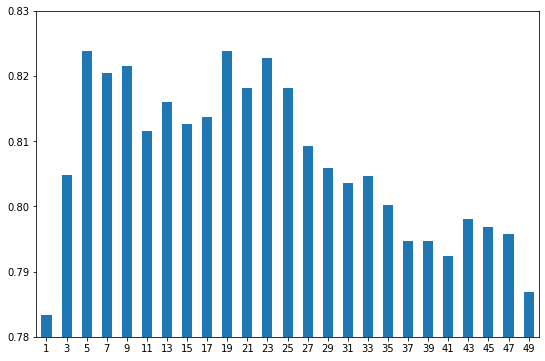

In [17]:
def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()

for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, all_X, all_y, cv=10)
    knn_scores[k] = np.mean(scores)
    
plot_dict(knn_scores)

## Automating Hyperparameter Optimization with Grid Search

In [19]:
hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.8293882646691635


## Submitting K-Nearest Neighbors Predictions to Kaggle

In [22]:
best_knn = grid.best_estimator_
holdout_predictions = best_knn.predict(holdout.drop(['PassengerId'],axis=1))


In [26]:
submission = pd.DataFrame({'PassengerId':holdout['PassengerId'], 'Survived':holdout_predictions})
submission.to_csv('submission_grid_knn.csv', index=False)

## Introducing Random Forests

In [28]:
rf = RandomForestClassifier(random_state = 1)

scores = cross_val_score(rf, all_X, all_y, cv=10)

accuracy_rf = np.mean(scores)

In [29]:
accuracy_rf

0.8204119850187267

## Tuning our Random Forests Model with GridSearch

In [32]:
hyperparameters = {
    "criterion": ["entropy", "gini"],
    "max_depth": [5, 10],
    "max_features": ["log2", "sqrt"],
    "min_samples_leaf": [1,5],
    "min_samples_split": [3,5],
    "n_estimators": [6,9]
}


rf = RandomForestClassifier(random_state = 1)
grid = GridSearchCV(rf, param_grid=hyperparameters, cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 6}
0.838414481897628


## Submitting Random Forest Predictions to Kaggle

In [33]:
best_rf = grid.best_estimator_
holdout_predictions = best_rf.predict(holdout.drop(['PassengerId'],axis=1))

submission = pd.DataFrame({'PassengerId':holdout['PassengerId'], 'Survived':holdout_predictions})
submission.to_csv('submission_grid_rf.csv', index=False)

## summary

|                       Model                      | Cross-validation score | Kaggle score |
|:------------------------------------------------:|:----------------------:|:------------:|
| Previous best Kaggle score                       | 82.3%                  | 78.0%        |
| Logistic regression baseline                     | 82.4%                  |              |
| K-nearest neighbors, k == 1                      | 78.6%                  |              |
| K-nearest neighbors, k == 19                     | 82.4%                  |              |
| K-nearest neighbors, best model from grid search | 82.8%                  | 75.6%        |
| Random forests, default hyperparameters          | 80.7%                  |              |
| Random forests, best model from grid search      | 84.3%                  | 77.1%        |